




<a id='top'></a>

# Homework 2: Introduction to Probability and Simulation
***

**Name**: 

***

This assignment is due on Canvas by **MIDNIGHT on Friday September 27**. Your solutions to theoretical questions should be done in Markdown directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your classmates, but **you must write all code and solutions on your own**.

**NOTES**: 

- Any relevant data sets should be available under the **Data** module on Canvas. To make life easier on the graders if they need to run your code, do not change the relative path names here. Instead, move the files around on your computer.
- If you're not familiar with typesetting math directly into Markdown then by all means, do your work on paper first and then typeset it later.  Remember that there is a [reference guide](https://math.meta.stackexchange.com/questions/5020/mathjax-basic-tutorial-and-quick-reference) linked on Canvas on writing math in Markdown. **All** of your written commentary, justifications and mathematical work should be in Markdown.
- Because you can technically evaluate notebook cells is a non-linear order, it's a good idea to do Kernel $\rightarrow$ Restart & Run All as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- It is **bad form** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** write a summary of the results in Markdown directly below your code. 
- This probably goes without saying, but... For any question that asks you to calculate something, you **must show all work and justify your answers to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit. 

---
**Shortcuts:**  [Problem 1](#p1) | [Problem 2](#p2) | [Problem 3](#p3) | [Problem 4](#p4) | [Problem 5](#p5) 

---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

***
<a/ id='p1'></a>
[Back to top](#top)

### [20 points] Problem 1

To play a game, you have a bag containing 30 fair six-sided dice, with faces `{1,2,3,4,5,6}`.  <img style="float: right; width: 200px; padding: 3mm;" src="https://images-na.ssl-images-amazon.com/images/I/619NZnvxJaL._SX425_.jpg" alt="Drawing"/>
This bag also contains 17 fair eight-sided dice (faces `{1,2,3,4,5,6,7,8}`) and 3 fair twenty-sided dice (faces `{1,2,3,4,...,19,20}`).  Call these 3 classes of die "Six", "Eight" and "Twenty" (or S, E, and T, for short). In order to be sure that you are not distinguishing dice by their feel, you are required to wear crab claw gloves. After donning your gloves, you grab one die at random from the bag. 

Work the following problems by hand (or claw) unless otherwise stated (but don't be afraid to simulate to check your result!). 

**Part A**: You roll your die one time.  What is the probability of the event $R_7$, that you roll a 7?  Include at least 4 decimal places in your answer.

In [2]:
S = np.array([1,2,3,4,5,6])
E = np.array([1,2,3,4,5,6,7,8])
T = np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])

bags_of_dice = {"die": np.array([S, E, T]), "probs": np.array([0.6, 0.34, 0.06])}

def roll_dice(dice):
    dice = np.random.choice(dice["die"], p=dice["probs"])
    roll = np.random.choice(dice)
    return roll

def simulate(dice, num, num_trials):
    rolls = np.array([roll_dice(dice) for i in range(num_trials)])
    return np.sum(rolls == num) / num_trials

In [3]:
simulate(bags_of_dice, 7, 100000)

0.04612

If we choose the six-sided, we have a probability of $0$ to roll a $7$. If we choose one of the eight-sided die, then we have a probability of $0.125$ to roll a $7$. And lastly, if we roll the twenty-sided die, we have a probability of $0.05$. Since we have different probabilities of choosing each respective die, we have to multiply the probabilities of choosing each die by the probability of choosing a $7$ given the die we chose.

The probability of rolling a 7 is given by:

$P(R_7) = (0.6)\cdot(0.0)+(0.34)\cdot(0.125)+(0.06)\cdot(0.05) = 0 + 0.0425 + 0.003 = 0.0455$

This is incredibly close to what I've computed in my simulation above.

Alternatively, we could compute the converse of what we did above and use the law of total probabilities to compute our value. 

$P(R_{!7}) = (0.6)\cdot(1)+(0.34)\cdot(0.875)+(0.06)\cdot(0.95) = 0.6 + 0.2975 + 0.057 = 0.9545$

And then using the law of total probability, we would get our value by:

$P(R_7) = 1 - P(R_{!7}) = 0.0455$

which matches what we did in our first method. This also matches our simulation above!!!

**Part B**: Suppose you roll a 7.  What is the probability that the die you chose from the bag is an Eight-sided die? 

We would write the sentence above as: $P(E\ |\ R_7)$. We have a different probability of rolling a $7$ with each different die. For example, $P(R_7\ |\ S)=0$, $P(R_7\ |\ E)=0.125$, and $P(R_7\ |\ T)=0.05$. However, we also have different probabilities of choosing the different die. 

$P(E\ |\ R_7) = \frac{P(E\ \cap\ R_7)}{R_7} = \frac{P(E)\cdot P(R_7)}{P(R_7)} = \frac{(0.34)(0.125)}{0.0455}=\frac{0.0425}{0.0455}=0.9341$

$P(T\ |\ R_7) = \frac{P(T\ \cap\ R_7)}{R_7} = \frac{P(T)\cdot P(R_7)}{P(R_7)} = \frac{(0.06)(0.05)}{0.0455}=\frac{0.003}{0.0455}=0.0659$

$0.9341+0.0659=1$, and this checks out because there is a probability of $0$ of rolling a $7$ with the six-sided die.

$P(E\ |\ R_7)=0.9341$

**Part C:**  Are the events $R_7$ and $E$ independent?  Justify your answer **using math**.

For sanity's sake, I'll answer this question in English first. Because the probability of rolling a $7$ changes based on which die we choose, and because the probability of choosing a specific die changes based on what value we rolled, we have dependent events.

As for showing this with math, we need to show that 1 of the following three tests is true:

**1.)** $P(A\ |\ B) = P(A)$

**2.)** $P(B\ |\ A) = P(B)$

**3.)** $P(A\ \cap\ B) = P(A)\cdot P(B)$

I'll actually show that **1 and 2** don't hold true, thus showing that the events $R_7$ and $E$ are *dependent*:

$\boxed{P(R_7\ |\ E) = 0.125 \neq 0.0455 = P(R_7)}$ 

$\boxed{P(E\ |\ R_7) = 0.9341 \neq 0.34 = P(E)}$ 

**Part D:**  Suppose you roll your die $n$ times and record each outcome.  Obviously, if you roll 7 or 8 you know you did *not* pick a Six-sided die, and if you roll a 9 or higher, you must have picked a Twenty-sided die.

But, if you roll $n$ times in a row and get only 1, 2, 3, 4, 5, or 6 you would have a stronger belief that you in fact grabbed one of the Six-sided dice.  Let $L_n$ be the event that you roll $n$ rolls of 1, 2, 3, 4, 5, or 6 in a row.  For example, one outcome in $L_3$ is the sequence 2, 3, 1.

Given that you roll a single value of 1, 2, 3, 4, 5, or 6, what is the probability that you have grabbed a Six-sided die?  That is, calculate **by hand** $P(S \mid L_1)$.

Given we have rolled a $1-6$, we would have a probability of 1 if we used the six sided die. We would have a probability of $\frac{3}{4}$ of rolling a $1-6$ with the eight sided die. And finally, we would have a probability of $\frac{3}{10}$ of rolling a $1-6$ with the twenty sided die. Next, we have different probabilities for rolling the different die. This gives us the prob for L_1:

$P(L_1) = (0.6)\cdot (1) + (0.34)\cdot (0.75) + (0.06)\cdot (0.3) = 0.6 + 0.255 + 0.018 = 0.873$

Using Bayes Thm., we could also get:

$P(S \mid L_1) = \frac{P(L_1 \mid S)\cdot P(S)}{P(L_1)} = \frac{(1)\cdot (0.6)}{0.873}$

And we can check our probability above by checking what the probability is of rolling the E or T die given that we have rolled a $1-6$:

$P((E \cup T) \mid L_1) = (0.6)\cdot (0) + (0.34)\cdot (0.25) + (0.06)\cdot (0.7) = 0.0 + 0.085 + 0.042 = 0.127$

And using the law of total probability, we get:

$1 - P(S \mid L_1) = P((E \cup T) \mid L_1) == 1 - 0.873 = 0.127$

So the probability we roll a $1-6$ is given by $0.873$. The probability we rolled the six-sided die given we rolled a $1-6$ is given by: $\frac{0.6}{0.873} = 0.687$

**Part E**:  

First, work out **by hand** a formula for the probability in general that you are rolling a Six-sided die, given that you have rolled $n$ values in a row that are 1, 2, 3, 4, 5 or 6 (that is, $L_n$).  So you want a formula for $P(S \mid L_n)$ in terms of $n$.

Then, define a function `prob_six` to calculate $P(S \mid L_n)$.  This function should only take one positive integer argument, $n$.

Verify that your function is performing as expected by checking your answer to **Part D**.

Initial intuition:

$L_n = (0.687)^n$

~ or ~

$f(x) = 0.687^x$

Next thoughts: (Bayes Thm.)

$P(S\mid L_n) = \frac{P(L_n\mid S)\cdot P(S)}{P(L_n)} = \frac{0.6}{0.873^n}$

Then, I tried a method of addition in the denominator:

$P(S\mid L_n) = \frac{0.6}{(0.6)(1)^n+(0.34)(0.75)^n+(0.06)(0.3)^n}$

In [4]:
def prob_six(n): #Your code goes here.
    numer = 0.6
    x1 = 0.6
    x2 = (0.75 ** n) * (0.34)
    x3 = (0.3 ** n) * (0.06)
    denom = x1+x2+x3
    return numer / denom

**Part F:**  What is the smallest value of $n$ successive rolls of 1, 2, 3, 4, 5 or 6 that would make you believe that there's a better-than-95% chance that the die you grabbed is Six-sided?  Plugging larger and larger values for $n$ into your `prob_six` function is a very reasonable way to check this.

In [5]:
#Code to determine smallest value of n
for i in range(1,20):
    if i == 9:
        print("\nLook! The the min value is below!\n")
    print("{} = {}".format(i, prob_six(i)))

1 = 0.6872852233676976
2 = 0.7531538316701186
3 = 0.8053069729517521
4 = 0.8473808781090273
5 = 0.8812780492557869
6 = 0.9083251148952147
7 = 0.929659421687253
8 = 0.9463090613586363

Look! The the min value is below!

9 = 0.9591866491403235
10 = 0.9690752747517922
11 = 0.9766259989076987
12 = 0.9823665345003605
13 = 0.9867163649261432
14 = 0.990004085181827
15 = 0.9924842843879131
16 = 0.9943526028704702
17 = 0.9957584639350022
18 = 0.9968154711854799
19 = 0.9976097004119685


From the data above, it appears 9 rolls would be the minimum number of rolls to have above a 95% chance that the die you grabbed was a six.

***
<a id='p2'></a>
[Back to top](#top)


### [20 points] Problem 2

Oscar and Stella are two octopuses who are very excited to have both secured professorships in the Computer Science department at CU. They work hard, but they also like to blow off a little steam after work. When they leave work from the CU Engineering Center ($E~$), they each head for one of five other locations: the Gym to get strong ($G~$), the Library to get learned ($L~$), the Boulder Reservoir to have a nice swim ($R$), the Hill to have a sandwich ($H~$), or to Brewing Market to have a nice Coffee ($C~$).  

Here are some rules governing their movements throughout the fair city of Boulder:
* When Oscar and/or Stella is leaving one location, they randomly select one of the available adjacent locations, with equal probability.
* This includes back-tracking. Eg. Stella could go from the Engineering Center to the Library, then directly back to the Engineering Center. 
* Assume that all moves require the same amount of time.
* They are also not allowed to stay put; they always must move to some *other* adjacent location.
* Oscar and Stella, being the think-for-yourselfers that they are, also act **independently** of one another. That is, the probability that Oscar goes from one place to another is independent of the probability of Stella's movements.

<img src="http://www.cs.colorado.edu/~tonyewong/home/resources/chris_and_dan_statespace.png" style="width: 300px;"/>

**Part A**: Oscar is exhausted from a long day of researching whether [P=NP](https://en.wikipedia.org/wiki/P_versus_NP_problem) so, naturally, he wants to go to the brewing market to grab a coffee. That being said, Oscar has made a break through in his research and wants to follow up on it at the library, but he needs to run some errands too. Assume Oscar can do his errands at any location on the map. 

Compute by hand the probability that Oscar goes to the Brewing Market ($C$) in his first stop, makes a second stop at any location, then goes to the Library ($L$) third. 

Well for starters, I will define $S_{uccess}=\text{the event that Oscar goes from (E) to (C) to any other stop (besides (L)) and finally to (L)}$

I'll define $C_1=\text{the event Oscar goes to the brewing market first.}$ We'll eventually see that $P(C_1)=0.25$

I'll also define $EL_2=\text{the event Oscar either goes to H or E (from C).}$ We'll later see that $P(EL_2)=\frac{2}{3}$, but this presents an issue...

Given Oscar starts at the engineering center (E), he has 4 places he can go to next, one of which being the Brewing market (C), this is event $C_1$. Oscar has a probability of $\frac{1}{4} = 0.25$ of going to the coffe shop first, this is $P(C_1)$. From there, we have a possibility of going to (H), (L), and (E). However, if we go to the library next, we cannot just stay-put so this would cause our event $S_{uccess}$ to fail. This means that we have a probability of $\frac{2}{3}$ of choosing either (H) or (E), the event $EL_2$. However, we run into a little bit of a problem here... Since Oscar's movements are random at each step, we can set up our equation like so:

$P(S_{uccess})=\frac{1}{4}\cdot \frac{1}{3}\cdot \frac{1}{3}+\frac{1}{4}\cdot \frac{1}{3}\cdot \frac{1}{4} = \frac{1}{36}+\frac{1}{48} = \frac{4}{144}+\frac{3}{144} = \frac{7}{144} = 0.0486$

**Part B**: Stella is a competitive body-building octopus professor. This is quite the feat given her lack of bones!  Compute (by hand) the probability that Stella ends up at the Gym _either_ as her first _or_ second location visited after leaving the Engineering Center ($E$). (Again, assume that Stella wanders the streets of Boulder randomly using the same rules described above.)

To solve this problem, I enumerated each possible walk Stella would end up at the gym either first or second. This got me the list: [EGR, EGL, EGE, EGH, ERG, ELG]. From here, I did much of what I did in the first part of this problem. 

$P(S_{uccess}) = \text{Stella starts at E and goes to the gym either first or second, i.e.: her walk is in our list of successful walks above}$

$P(EGR) = \frac{1}{4} \cdot \frac{1}{4} = \frac{1}{16}$

$P(EGL) = \frac{1}{4} \cdot \frac{1}{4} = \frac{1}{16}$

$P(EGE) = \frac{1}{4} \cdot \frac{1}{4} = \frac{1}{16}$

$P(EGH) = \frac{1}{4} \cdot \frac{1}{4} = \frac{1}{16}$

$P(ERG) = \frac{1}{4} \cdot \frac{1}{2} = \frac{2}{16}$

$P(ELG) = \frac{1}{4} \cdot \frac{1}{4} = \frac{1}{16}$

$P(S_{uccess}) = P(EGR) + P(EGL) + P(EGE) + P(EGH) + P(ERG) + P(ELG) = \frac{1}{16} + \frac{1}{16} + \frac{1}{16} + \frac{2}{16} + \frac{1}{16} = \frac{7}{16} = 0.4375$

**Part C**: Suppose that Stella works late at the Engineering Center, while Oscar goes to the Gym.  Later, they both leave and wander around, randomly and independently of one another, as described above.
1. What is the probability that they run into each other in the same location on the first location visited?  
2. Given their two initial locations, what is the probability that they meet at the Hill after 2 moves?

**1.** So for the first half of this problem, we only have two possibilities: That Oscar goes from E to R and Stella goes from G to R, or that Oscar goes from E to L and Stella goes from G to L. The probability that Oscar goes from E to R or E to L is both $\frac{1}{4}$ respectively. The same goes for both of Stella's successful options. Since Both ER and GR have to occur at the same time to be successful, and because both events are independent, we must multiply their probabilities together resulting in a $\frac{1}{16}$ chance of Oscar and Stella meeting at R given their starting locations. We have the same probability of them both going to L given their starting location, and because both of these cases are successful, we add them. Overall, we have a probability of 0.125 of Oscar and Stella ending up at the same place given their starting locations.

**2.** For the second half of the problem, I decided to take a peek at Oscar and Stella individually. Oscar has three possible walks to get to the hill and Stella has one. Given this information, we have three possible outcomes: Oscar has one of his three successful outcomes occur while Stella simultaneously has her successful outcome occur.

$P(ELH \cap GLH) = \frac{1}{16} \cdot \frac{1}{16} = \frac{1}{256}$

$P(EGH \cap GLH) = \frac{1}{16} \cdot \frac{1}{16} = \frac{1}{256}$

$P(ECH \cap GLH) = \frac{1}{16} \cdot \frac{1}{16} = \frac{1}{256}$

$P(S_{uccess}) = P(ELH \cap GLH) + P(EGH \cap GLH) + P(ECH \cap GLH) = \frac{3}{256} = 0.011718$

**Part D**: Write a simulation to confirm that your by-hand calculations in **Part A**, **Part B**, and **Part C** are correct. Make sure you run your simulations for enough trials that your estimates are reasonably close to your analytic results. In addition to showing your code, you should explain in Markdown (not just in code comments) what your code is doing and why it is a reasonable approximation of the probabilities in **Part A**, **Part B**, and **Part C**.  

In [6]:
graph = {'H': np.array(['G', 'L', 'C']), 
         'G': np.array(['H', 'L', 'E', 'R']), 
         'R': np.array(['G', 'E']), 
         'L': np.array(['H', 'G', 'E', 'C']), 
         'E': np.array(['G','L','C','R']), 
         'C': np.array(['H', 'L', 'E'])
        }

'''
takes as input:
    g: a graph implemented as a dictionary with numpy array adj list
    n: length of the random walk
    start: the starting node where each walk should start from.
output:
    the string of nodes in the random walk of length n
'''
def random_walk(g, n, start):
    nn = 0
    final_string = start
    node = np.random.choice(g[start])
    final_string += node
    for i in range(n-2):
        node = np.random.choice(g[node])
        final_string += node
    return final_string

So this cell is defining the graph in the problem as a dictionary with adjacency lists as numpy arrays so I can take a random choice from a given source node. 

In my func: random_walk, we simulate a random walk in our given graph of length n. We can then define successful walks and run my function 1,000's of times to figure out how many successful runs we had.

In [7]:
# Part A
success_paths = ['ECHL', 'ECEL']

num_tests = 100000
num_success = 0
for i in range(num_tests):
    walk = random_walk(graph, 4, 'E')
    if walk in success_paths:
        num_success += 1

prob_A = num_success / num_tests
print("The probability that Oscar goes from E to C then to either H or E, then finally to L is: {}".format(prob_A))

The probability that Oscar goes from E to C then to either H or E, then finally to L is: 0.04755


So, I've defined a list: success_paths with elements 'ECHL' and 'ECEL' as these are the only ways Oscar can achieve success in part A. We then run random_walk with our given graph, length of 4, and starting node 'E' in a for loop num_tests times. If our random_walk is in success_paths, we then increment a value num_success. Finally to compute the probability we take num_success over num_tests.

As one can tell from my output above, the probability of Oscar achieving success in part A with 100,000 tests is pretty close to 0.0486, which is the value I computed by hand.

In [8]:
# Part B
success_paths = ['EGR', 'EGL', 'EGE', 'EGH', 'ERG', 'ELG']

num_tests = 100000
num_success = 0
for i in range(num_tests):
    walk = random_walk(graph, 3, 'E')
    if walk in success_paths:
        num_success += 1

prob_B = num_success / num_tests
print("The probability that Stella goes from E then to the G either first or second: {}".format(prob_B))

The probability that Stella goes from E then to the G either first or second: 0.43687


Same as for part A, except I've defined my success_list as: [EGR, EGL, EGE, EGH, ERG, ELG], and run the same exact simulation as above...

Also same as in part A, my work by hand was 0.4375, and my simulation produced a similar probability of 0.43826 with 100,000 runs. This is fairly close, and with tests with more runs we'd likely see a value closer to the probability we got by hand.

In [9]:
# Part C
# Part 1
success_paths_1o = ['ER']
success_paths_1s = ['GR']
success_paths_2o = ['EL']
success_paths_2s = ['GL']

num_tests = 100000
num_success = 0
for i in range(num_tests):
    walk_o = random_walk(graph, 2, 'E')
    walk_s = random_walk(graph, 2, 'G')
    if (walk_o in success_paths_1o) and (walk_s in success_paths_1s):
        num_success += 1
    if (walk_o in success_paths_2o) and (walk_s in success_paths_2s):
        num_success += 1

prob_C1 = num_success / num_tests
print("The probability that Stella and Oscar meet at the same place in their first stop: {}".format(prob_C1))

# Part 2
success_paths_o = ['ELH', 'EGH', 'ECH']
success_paths_s = ['GLH']

num_tests = 100000
num_success = 0
for i in range(num_tests):
    walk_o = random_walk(graph, 3, 'E')
    walk_s = random_walk(graph, 3, 'G')
    if (walk_o in success_paths_o) and (walk_s in success_paths_s):
        num_success += 1

prob_C2 = num_success / num_tests
print("The probability that Stella and Oscar both meet at H in their second stop: {}".format(prob_C2))

The probability that Stella and Oscar meet at the same place in their first stop: 0.12625
The probability that Stella and Oscar both meet at H in their second stop: 0.01275


Lastly, for part 1 of this problem, I defined 2 seperate success lists because ER had to correspond to GR and EL to GL. If the lists corresponded from each walk then it was marked as a successful trial.

For part 2 of this problem, since I only had one possible successful outcome for Stella, I could just test each walk outright in one if statement unlike part 1.

Both parts of my simulated tests match reasonably closely to the values I computed by hand like in previous problems! This was honestly really cool to me that I could write these basic simulations to test my work done by hand.

***
<a/ id='p3'></a>
[Back to top](#top)

### [20 points] Problem 3  

As part of their Computer Science Jedi training, Zach and Rachel are having a lightsaber duel. The rules of the lightsaber duel are as follows:
* The duel is composed of a number of rounds.
* Each round consists of Zach practicing his sweetest Jedi moves and trying to strike Rachel, then Rachel practicing *her* best moves and trying to strike Zach.
* If Zach manages to strike Rachel, then Zach is awarded a point, and similarly if Rachel manages to strike Zach, then Rachel is awarded a point.
* If a round ends in a tie, then Zach and Rachel proceed to another round. If a round ends with one Jedi scoring a point but the other one does not, then the Jedi who scored a point wins the duel.

Let $Z$ be the event that "Zach wins the duel", $E$ be the event that "the duel ends after the first round of lightsaber strikes", and $C$ be the event that "the duel continues after the first round of lightsaber strikes".  Suppose that the result of one lightsaber strike is independent of the other strikes, Zach successfully lands his lightsaber strikes with probability $p$, and Rachel lands her strikes with probability $q$.

**Part A**: The duel will continue until Zach or Rachel wins.  What is the sample space $\Omega$ for this "experiment"?  Represent the outcomes of individual lightsaber strikes by $H$ for a hit and $M$ for a miss, and assume that Zach has the first strike in each round. At the very least, your answer should include all of the events in $\Omega$ that include one or two rounds.

$\Omega=\{HM, MH, MMMH, MMHM, HHMH, HHHM, ...\}$



**Part B**: Determine $P(Z \mid E)$ in terms of $p$ and $q$.

$p = \text{prob. that Zach lands his strike}$

$(1-p) = \text{prob. that Zach DOES NOT land his strike}$

$q = \text{prob. that Rachel lands her strike}$

$(1-q) = \text{prob. that Rachel DOES NOT land her strike}$

$P(Z \mid E) = \frac{1}{2}$

I initially thought that this problem was: $p(q-1)$, but a piazza post led me in the right direction. The reason that the answer is just $\frac{1}{2}$ is because it is given that the duel only lasts one round. This basically means that either Rachel hits and Zach misses or Zach hits and Rachel misses. So the probability that Zach wins given that it ends in one round is more clearly 1 out of 2.

The only games that end in the first round are: 

$\Omega=\{HM, MH\}$, and the only game where Zach wins is: $HM$, so he has a 0.5 chance of winning.

In terms of p and q, the equation would look like: $\boxed{\frac{p(q-1)}{p(q-1)+q(p-1)}}$

**Part C**: Explain why events $C$ and $Z$ are independent. 

$C$ and $Z$ are independent because Zach winning the duel has no impact on our knowledge of the duel continuing. I suppose we'd know that there's a higher likelihood of the duel lasting longer than 1 round but other than that, we don't really know. Also, knowing the duel continues after the first round, Zach has the same probability.

Shown in more formal notation:

$P(C\mid Z) = P(C)$

$P(Z\mid C) = P(Z)$

$P(Z \cap C) = P(Z)\cdot P(C)$

Since these three properties hold true, we have independent events $Z$ and $C$

**Part D**: Use the Law of Total Probability to show that $P(Z) = p(1-q) + (2pq - p - q +1) ~P(Z \mid C)$. 

I don't even know where to begin on this one really without fully copying it from online.

**Part E**: Use the fact from **Part B** that $P(Z \mid C) = P(Z)$ to determine $P(Z)$ in terms of $p$ and $q$.

Well, yet again, even only examining the sample space containing the games that lasted exactly two rounds or three rounds, given as:

$\Omega = \{HHHM, HHMH, MMHM, MMMH, HHHHHM, HHHHMH, HHMMHM, HHMMMH, MMHHHM, MMHHMH, MMMMHM, MMMMMH \}$

As one can see, there are 12 possible outcomes for duels lasting either 2 or 3 rounds. Also, all the games that end in a M are Zach's victory. Zach still has a 0.5 probability of winning (still with repsect to p and q somehow). I feel like it would be a sum of probabilities much like in the simplified version in part B.

**Part F**: Explain why the answers to **Part B** and **Part E** are the same. 

It doesn't matter whether there is 1 round or a million, Zach still has 1 half of the outcomes in his favor. I'm not entirely sure how this relates to p, and q compared to part B.

**Part G**: Explain the significance of the solution technique for $P(Z)$ outlined in **Part D** and **Part E**.  Why did we go this route instead of computing $P(Z)$ directly?  Can we always use such techniques?  What assumption did we need to make in order to use this solution approach?

Im not entirely sure, but I know if I had more time I could have figured out a way to mathematically show $P(Z)$ with the equation I figured out in part B, and with my simulation capabilities below:

In [10]:
p = [0.55, 0.45]
q = [0.45, 0.55]

Z = np.array(["H","M"])
R = np.array(["H","M"])

def one_round(p1,p2,pp,qq):
    x = np.random.choice(p1,p=pp)
    y = np.random.choice(p2,p=qq)
    return x + y

def duel(p1, p2, pp, qq, n):
    s = ""
    for i in range(n):
        x = one_round(p1, p2, pp, qq)
        s += x
        if (x == "HM" or x == "MH") and (n != 1) and (i < n-1):
            return None
        if (x == "MM" or x == "HH") and ((n == 1) or (i == n-1)):
            return None
    return s

success1 = ['HM']
success_count1 = 0
l1 = list()

success2 = ['HHHM', 'MMHM']
success_count2 = 0
l2 = list()

for i in range(10000):
    l1_x = duel(Z,R,p,q,1)
    if l1_x != None:
        l1.append(l1_x)
    if l1_x in success1:
        success_count1 += 1
        
    l2_x = duel(Z,R,p,q,2)
    if l2_x != None:
        l2.append(l2_x)
    if l2_x in success2:
        success_count2 += 1

p1 = success_count1 / len(l1)
p2 = success_count2 / len(l2)

print("probability Zach wins, given the duel ends in the first round is {0:.3f}".format(p1))
print("probability Zach wins, given the duel continues after the first round (and ends in the second round) is {0:.3f}".format(p2))

probability Zach wins, given the duel ends in the first round is 0.600
probability Zach wins, given the duel continues after the first round (and ends in the second round) is 0.608


So when $p=q=0.5$, Zach wins roughly half of the games when the duel ends in the first round as well as when the duel continues (and finishes) in the second round. Actually, anytime $p=q$, they each win roughly the same amount of duels. However, my second test was when $p = 0.55,\ q = 0.45$. This produced roughly 0.6 of wins going to Zach.

***
<a id='p4'></a>
[Back to top](#top)

### [25 points] Problem 4

In this problem you will write some code to simulate the game of **Miniopoly** (a very rough approximation of [Monopoly](https://en.wikipedia.org/wiki/Monopoly_(game)).  The game consists of a round board with 40 "squares" numbered from $0$ to $39$, where squares $0$ and would-be $40$ are [coincident](https://en.wikipedia.org/wiki/Coincident) and called **GO**.  A player starts on **GO** with \\$200 in their pocket.  On each turn the player rolls a pair of dice and then moves a number of spaces equal to the sum of the dice.  Landing on different squares have different results: 

- Squares 3, 7, 15, 22, 33, and 36 cause you to draw a card.  The cards tell you to collect either \\$50 or \\$250 or pay the bank \\$50.  There is always an equal probability associated with each of these possible cards.


- Squares 0, 10, and 20 do not trigger any action 


- Square 30 is **Go To Jail**, which sends the player directly to **Jail** and ends the turn 

- If a player starts a turn from **Jail** she rolls two dice: 

    - If the player rolls doubles (i.e. the dice have equal values) the player moves from Square 10 a number of squares equal to the sum of the dice
    
    - If the player rolls anything other than doubles she pays the bank \$20 and remains in **Jail** 
    

- If the player passes or lands on **GO** she collects \$200. 

- If the player lands on any other square not mentioned above, she pays the bank \$25. 


If at any point the player has \$0 or less they go bankrupt and the game ends.

See [here](http://www.cs.colorado.edu/~tonyewong/home/resources/miniopoly_example.png) for an example of the Miniopoly board layout.

<br>

**Part A**: Complete the function miniopoly_turn below. The function should simulate one turn of Miniopoly.  It should take as arguments the player's current location on the board as well as the player's current cash reserves, and return the player's new location and cash reserves after the turn has completed. Note that if a player goes bankrupt during the game you should return their cash as 0 instead of a negative value.  

In [11]:
def roll_die():
    dice = np.array([1,2,3,4,5,6])
    return np.random.choice(dice)

def draw_card():
    cards = np.array([50,250,-50])
    return np.random.choice(cards)

def decide_cash(state, roll):
    if state == 'jail':
        return -20
    if (state - roll) < 0:
        return 200
    if state == 0 or state == 10 or state == 20:
        return 0
    if state == 3 or state == 7 or state == 15 or state == 22 or state == 33 or state == 36:
        return draw_card()
    else:
        return -25
    
def miniopoly_turn(state, cash):
    if state == 'jail':
        d1 = roll_die()
        d2 = roll_die()
        roll = d1 + d2
        if d1 == d2:
            state = 10 + (roll)
            cash += decide_cash(state, roll)
        else:
            state = 'jail'
            cash += decide_cash(state, roll)
        return state, cash
    roll = roll_die() + roll_die()
    state = (state + roll) % 39
    cash += decide_cash(state, roll)
    if state == 30:
        state = 'jail'
    return state, cash

### Roll Die
So this function is incredibly straight forward: it just returns 1-6, the roll of a single die.

### Draw Card
This function just returns the result of drawing a card, also very simple.

### Decide Cash
So this function is a little complicated and although it works, I would've liked to rewrite the code to be more human friendly. For example, in my miniopoly turn function, when I'm in jail, I decided to return my state as 'jail'. This accounts for the first if statement where I just return -20 for the "jail fee". The next if statement gets handled bizarrely, but it does in fact work for giving out the "Passing Go" money in the larger picture. Then I handle the cases where the player would draw a card and where no action occurs. Finally, I handle all other cases where the user simply owes the bank $25.

### Miniopoly Turn
This function takes the turn of the user. It handles everything properly, but it is kind of messy.

**Part B**: Use your function from **Part A** to Simulate at least 10000 25-turn games of Miniopoly and make a frequency histogram of the player's cash at the end of the game.

In [12]:
cash_list = list()
jail_list = list()
num_games = 10000
for i in range(num_games):
    state = 0
    cash = 200
    jail_count = 0
    for ii in range(25):
        state, cash = miniopoly_turn(state, cash)
        if state == 'jail':
            jail_count += 1
        if cash == 0:
            cash_list.append(cash)
            jail_list.append(jail_count)
            break
    jail_list.append(jail_count)
    cash_list.append(cash)
#     print("game #{}, state = {}, cash = {}, jail count = {}".format(i, state, cash, jail_count))

Text(0, 0.5, 'Frequency')

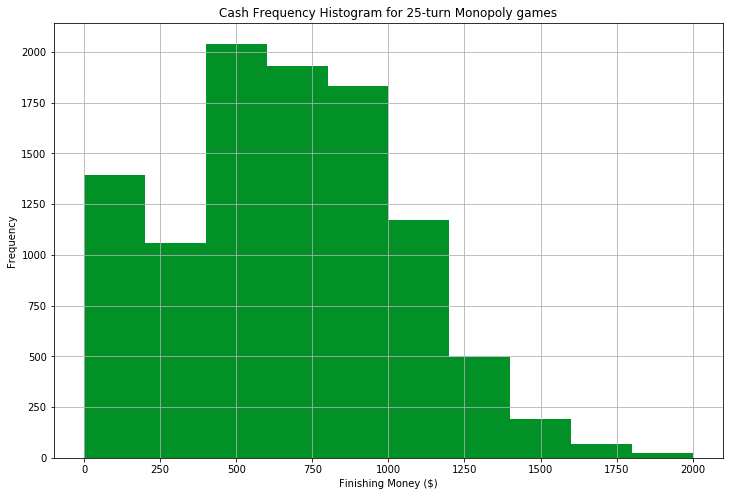

In [13]:
df = pd.DataFrame(cash_list)

my_bins = range(0,2200,200)

count, div = np.histogram(df, bins = my_bins)
df.hist(bins=div, figsize=(12,8), color='#019126')
plt.title('Cash Frequency Histogram for 25-turn Monopoly games')
plt.xlabel('Finishing Money ($)')
plt.ylabel('Frequency')

So above, I actually simulate the games with nested for loops. Again, messy because it takes a while, but I suppose that is probably just the nature with simulating things 100,000 times. If this was something more important than monopoly games, it might be worth it to distinguish going to jail on seperate occasions and staying in jail for a while (which I didn't distinguish). I create lists that hold a players cash and jail count, and although I know my interpretation is lazy, I believe it wouldn't change our numbers to drastically. Then, I produce my cash frequency histogram using only the cash data.

**Part C**: Use your code from **Part A** to estimate the probability that a player goes bankrupt in a game that only lasts 25 turns.

In [14]:
d = {'Cash': cash_list, 'Jail Count': jail_list}

special_df = pd.DataFrame(d, columns=['Cash', 'Jail Count'])

special_df['bankrupt'] = special_df['Cash'].apply(lambda row: 1 if row==0 else 0)

bankrupt_games = special_df['bankrupt'].sum()
num_games = 10000
prob_bankrupt = bankrupt_games / num_games
print("The probability someone goes bankrupt in a game only lasting 25 turns is: {}".format(prob_bankrupt))

The probability someone goes bankrupt in a game only lasting 25 turns is: 0.091


**Part D**: Use your code from **Part A** to estimate the probability that a player goes bankrupt in a 25 turn game  _given_ that they went to **Jail** at least twice.  Is a player more or less likely to go bankrupt if they've been to **Jail** twice?  

In [15]:
special_df['jail_gte_twice'] = special_df['Jail Count'].apply(lambda row: 1 if row>=2 else 0)

num_players_jail_gte_twice = special_df['jail_gte_twice'].sum()

num_players_bankrupt_and_lotsa_jail = len(special_df[(special_df['jail_gte_twice'] == 1) & (special_df['bankrupt'] == 1)])

prob_bankrupt_given_jail = num_players_bankrupt_and_lotsa_jail / num_players_jail_gte_twice

print("The probability someone goes bankrupt GIVEN that they went to jail twice or more is: {0:.5f}".format(prob_bankrupt_given_jail))

The probability someone goes bankrupt GIVEN that they went to jail twice or more is: 0.14272


Initially, I have to apologize for my variable names. As I got done, I was thinking to myself that they are pretty obnoxious.

Anyways, for this problem, I create a new column in my dataframe that holds a 1 if someone has been to jail 2 or more times, and a 0 otherwise. I use this column to get the total number of players who've been to jail twice or more. I then use this column and the column I created previously called $bankrupt$ that holds a 1 if a player went bankrupt to get the number of players of both bankrupt.

**Part E**: Use your code from **Part A** to estimate the probability (either directly or using Bayes' Rule) that a player has gone to jail at least twice, given that the player went bankrupt in the first 25 turns.

In [16]:
num_players_bankrupt = special_df['bankrupt'].sum()

num_players_lotsa_jail_given_bankrupt = len(special_df[(special_df['jail_gte_twice'] == 1) & (special_df['bankrupt'] == 1)])

prob_jail_given_bankrupt = num_players_bankrupt_given_lotsa_jail / num_players_bankrupt

print("The probability someone goes to jail twice or more GIVEN that they went bankrupt is: {0:.5f}".format(prob_jail_given_bankrupt))

NameError: name 'num_players_bankrupt_given_lotsa_jail' is not defined

So, I wasn't particularly sure how to apply Bayes Thm. in this case because parts D and E seem like inverses of each other. I used the total number of bankrupt people or total number of people who'd been to jail twice or more as my denomenator. I then made my numerator the total number of people that went bankrupt and went to jail twice or more. This was the same for D and E, and I'm not 100% this is correct, but it seems plausible.

ALSO: After both D and E, it seems more likely that going bankrupt is a more likely factor in determining if the player will go to jail. It seems more players who went to jail frequently also went bankrupt, and it seems like a lot of people who went to jail (even frequently) didn't necessarily go bankrupt more.

***
<a id='p5'></a>
[Back to top](#top)

### [15 points] Problem 5

To get published in an academic journal, you have to prove something "interesting."  As a result, most academics begin their research by investigating hypotheses that, all else equal, are unlikely to be true.  Suppose each research project begins with a research *claim* that has a 10% chance of being correct.

They then perform a study that satisfies the following two properties:

    1) The probability that they correctly *find* an important result given that their *claim* is true is 50%
    2) The probability that they incorrectly *find* an important result given that their *claim* is false is 5%

If they *find* an important result they are published.  What is the probability that their *claim* was true, given that they were published?

I solved this problem using a tree:

$RC=$Research Claim

$T=$True

$F=$False

$P=$Published

$NP=$Not Published


`>  R  C
   /   \
  T     F
 / \   / \
P  NP P  NP   
`

We have a 10% chance of having a true claim and a 90% chance of ahving a false claim. Given our research team's experiemntal properties, given our claim is true, we'd see a 50/50 chance of being published. Given an RC that's false, we'd have a 5% chance of being published. This gave me the equations of:

$P(P)=T\cdot P + F\cdot P = (0.1)(0.5)+(0.9)(0.05)=0.05+0.045=0.095$

$P(T\cap P)=P(T)\cdot P(P)=(0.1)(0.5)=0.05$

$P(T\mid P)=\frac{P(T\cap P)}{P(P)}=\frac{0.05}{0.095}=0.5263$

This happens to closely resemble my simulation below:

In [ ]:
research_claims = np.array([True, False])

true_findings = np.array(['P', 'NP'])

false_findings = np.array(['P', 'NP'])

def choose_claim(np_arr):
    return np.random.choice(np_arr, p=[0.1, 0.9])

num_imp = 0
num_imp_true = 0

for i in range(100000):
    TorF = choose_claim(research_claims)
    if (TorF):
        tf = np.random.choice(true_findings, p=[0.5, 0.5])
        if tf == 'P':
            num_imp += 1
            num_imp_true += 1
    else:
        ff = np.random.choice(false_findings, p=[0.05, 0.95])
        if ff == 'P':
            num_imp += 1
    
print(num_imp_true / num_imp)